# Packages

In [17]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading the data

In [18]:
#DataFrame contains each Node with its centrality measures
data = pd.read_csv("Data/nodesByCentralityMeasures.csv")
data

,Node,DC,BC,CC,EC
0,0,0.085934,1.463059e-01,0.353343,3.391796e-05
1,1,0.004210,2.783274e-06,0.261376,6.045346e-07
2,2,0.002476,7.595021e-08,0.261258,2.233461e-07
3,3,0.004210,1.685066e-06,0.261376,6.635648e-07
4,4,0.002476,1.840332e-07,0.261258,2.236416e-07
...,...,...,...,...,...
4034,4034,0.000495,0.000000e+00,0.183989,2.951270e-10
4035,4035,0.000248,0.000000e+00,0.183980,2.912901e-10
4036,4036,0.000495,0.000000e+00,0.183989,2.931223e-10
4037,4037,0.000991,7.156847e-08,0.184005,2.989233e-10


In [19]:
#Nodes and its DC ordered by DC
DC_Nodes = data.sort_values('DC',ascending=False)
DC_Nodes = DC_Nodes[['Node', 'DC']]
DC_Nodes.rename(columns = {'Node':'DCN'}, inplace = True)
DC_Nodes.reset_index(drop=True, inplace=True)
DC_Nodes

,DCN,DC
0,107,0.258791
1,1684,0.196137
2,1912,0.186974
3,3437,0.135463
4,0,0.085934
...,...,...
4034,602,0.000248
4035,585,0.000248
4036,3451,0.000248
4037,3856,0.000248


In [20]:
#Nodes and its BC ordered by BC
BC_Nodes = data.sort_values('BC',ascending=False)
BC_Nodes = BC_Nodes[['Node', 'BC']]
BC_Nodes.rename(columns = {'Node':'BCN'}, inplace = True)
BC_Nodes.reset_index(drop=True, inplace=True)
BC_Nodes

,BCN,BC
0,107,0.480518
1,1684,0.337797
2,3437,0.236115
3,1912,0.229295
4,1085,0.149015
...,...,...
4034,3451,0.000000
4035,3445,0.000000
4036,1252,0.000000
4037,1253,0.000000


In [21]:
#Nodes and its CC ordered by CC
CC_Nodes = data.sort_values('CC',ascending=False)
CC_Nodes = CC_Nodes[['Node', 'CC']]
CC_Nodes.rename(columns = {'Node':'CCN'}, inplace = True)
CC_Nodes.reset_index(drop=True, inplace=True)
CC_Nodes

,CCN,CC
0,107,0.459699
1,58,0.397402
2,428,0.394837
3,563,0.393913
4,1684,0.393606
...,...,...
4034,699,0.178262
4035,749,0.178262
4036,750,0.178262
4037,692,0.178255


In [22]:
#Nodes and its EC ordered by EC
EC_Nodes = data.sort_values('EC',ascending=False)
EC_Nodes = EC_Nodes[['Node', 'EC']]
EC_Nodes.rename(columns = {'Node':'ECN'}, inplace = True)
EC_Nodes.reset_index(drop=True, inplace=True)
EC_Nodes

,ECN,EC
0,1912,9.540696e-02
1,2266,8.698328e-02
2,2206,8.605239e-02
3,2233,8.517341e-02
4,2464,8.427877e-02
...,...,...
4034,841,6.446055e-14
4035,749,6.433195e-14
4036,775,6.433195e-14
4037,692,6.385265e-14


In [23]:
#Top 10 Nodes and its Topsis score ordered by Topsis score
top10NodesTopsis = pd.read_csv("Data/top10NodesTopsis.csv")
top10NodesTopsis.rename(columns = {'Node':'TopsisN'}, inplace = True)
top10NodesTopsis.reset_index(drop=True, inplace=True)
top10NodesTopsis

,TopsisN,Topsis
0,107,0.913277
1,1684,0.695566
2,1912,0.496063
3,3437,0.488865
4,0,0.304321
5,1085,0.297379
6,698,0.231106
7,567,0.193646
8,58,0.169464
9,428,0.132923


In [24]:
#Top 10 Nodes of each centrality measures
topK = pd.concat([DC_Nodes['DCN'], BC_Nodes['BCN'], CC_Nodes['CCN'], EC_Nodes['ECN'], top10NodesTopsis['TopsisN']], axis=1)
top10 = topK.head(10)
top10 = top10.assign(TopsisN = top10['TopsisN'].astype(int))
top10

,DCN,BCN,CCN,ECN,TopsisN
0,107,107,107,1912,107
1,1684,1684,58,2266,1684
2,1912,3437,428,2206,1912
3,3437,1912,563,2233,3437
4,0,1085,1684,2464,0
5,2543,0,171,2142,1085
6,2347,698,348,2218,698
7,1888,567,483,2078,567
8,1800,58,414,2123,58
9,1663,428,376,1993,428


In [25]:
N = 4039 #number of nodes

In [26]:
# read the network dataset
G = nx.Graph()
data = open("facebookNet.txt","r")
lines=data.readlines()
for line in lines:
    line_split=line.split(" ")
    G.add_edge(int(line_split[0]),int(line_split[1]))

In [27]:
def SI_model(Nodes):
    outputlst = []
    # Model selection
    model = ep.SIModel(G)

    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 0.3)
    cfg.add_model_initial_configuration('Infected', Nodes)
    model.set_initial_status(cfg)
    
    output = pd.DataFrame(columns = ['Iteration', 'nbrSuscepible', 'nbrInfected'])
    for i in range(N):  
        # Simulation execution
        iteration = model.iteration()
        output.loc[len(output.index)] = [iteration['iteration'], iteration['node_count'][0], iteration['node_count'][1]]
        if iteration['node_count'][1] == N:
            break 
    outputlst.append(output['Iteration'].tolist())
    outputlst.append(output['nbrSuscepible'].tolist())
    outputlst.append(output['nbrInfected'].tolist())
    
    return outputlst

In [28]:
#DataFrame to set
top10ByDC = set(top10['DCN'])
top10ByBC = set(top10['BCN'])
top10ByCC = set(top10['CCN'])
top10ByEC = set(top10['ECN'])
top10ByTopsis = set(top10['TopsisN'])

In [30]:
DClst = []
BClst = []
CClst = []
EClst = []
TOPSISlst = []
iteration = 1000 #Number of iterations
for i in range(iteration):
    DClst.append(SI_model(top10ByDC))
    BClst.append(SI_model(top10ByBC))
    CClst.append(SI_model(top10ByCC))
    EClst.append(SI_model(top10ByEC))
    TOPSISlst.append(SI_model(top10ByTopsis))

In [32]:
def Std_mean(lis):
    dc = {}
    sd = []
    mean = []
    for i in range(iteration):
        for j in range(len(lis[i][0])):
            dc[lis[i][0][j]]=[]
    for i in range(iteration):
        for j in range(len(lis[i][0])):
            dc[lis[i][0][j]].append(lis[i][2][j])
    for i in dc:
        sd.append(np.std(dc[i]))
        mean.append(np.mean(dc[i]))
    return mean, sd

In [33]:
DCmean, DCsd = Std_mean(DClst)
BCmean, BCsd = Std_mean(BClst)
CCmean, CCsd = Std_mean(CClst)
ECmean, ECsd = Std_mean(EClst)
TOPSISmean, TOPSISsd = Std_mean(TOPSISlst)

# Visualisation of results

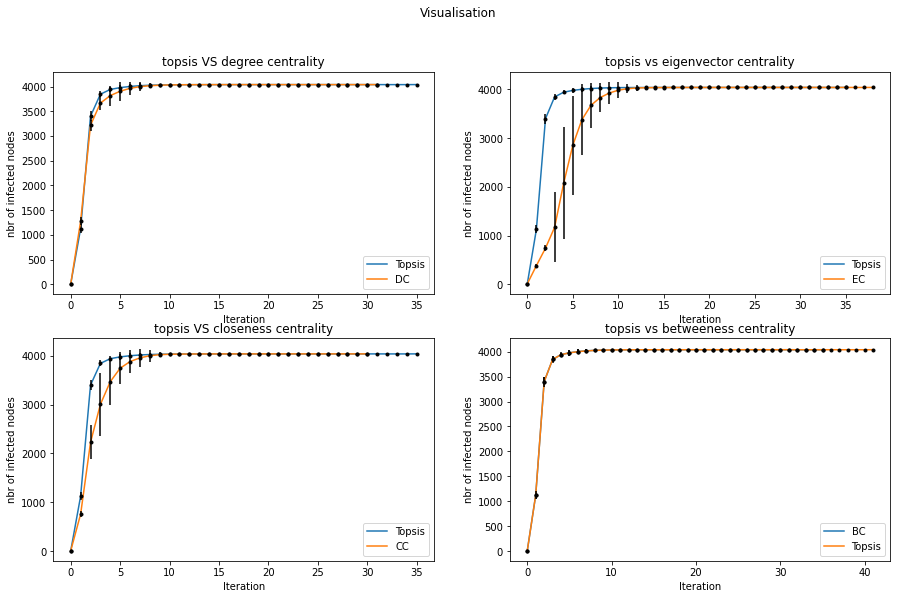

In [50]:
fig, ax = plt.subplots(2, 2,figsize=(15, 9))
ax[0, 0].set_title('topsis VS degree centrality')
ax[0, 0].plot(list(range(len(TOPSISmean))), TOPSISmean, label='Topsis')
ax[0, 0].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=[x * 3 for x in TOPSISsd], fmt ='.k')
ax[0, 0].plot(list(range(len(DCmean))) , DCmean, label='DC')
ax[0, 0].errorbar(list(range(len(DCmean))), DCmean, yerr=[x * 3 for x in DCsd], fmt ='.k')
ax[0, 0].legend()

ax[1, 0].set_title('topsis VS closeness centrality')
ax[1, 0].plot(list(range(len(TOPSISmean))), TOPSISmean, label='Topsis')
ax[1, 0].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=[x * 3 for x in TOPSISsd], fmt ='.k')
ax[1, 0].plot(list(range(len(CCmean))) , CCmean, label='CC')
ax[1, 0].errorbar(list(range(len(CCmean))) , CCmean, yerr=[x * 3 for x in CCsd], fmt ='.k')
ax[1, 0].legend()

ax[0, 1].set_title('topsis vs eigenvector centrality')
ax[0, 1].plot(list(range(len(TOPSISmean))), TOPSISmean, label='Topsis')
ax[0, 1].errorbar(list(range(len(TOPSISmean))), TOPSISmean, [x * 3 for x in TOPSISsd], fmt ='.k')
ax[0, 1].plot(list(range(len(ECmean))) , ECmean, label='EC')
ax[0, 1].errorbar(list(range(len(ECmean))) , ECmean, yerr=[x * 3 for x in ECsd], fmt ='.k')
ax[0, 1].legend()

ax[1, 1].set_title('topsis vs betweeness centrality')
ax[1, 1].plot(list(range(len(TOPSISmean))), TOPSISmean, label='BC')
ax[1, 1].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=[x * 3 for x in TOPSISsd], fmt ='.k')
ax[1, 1].plot(list(range(len(BCmean))) , BCmean, label='Topsis')
ax[1, 1].errorbar(list(range(len(BCmean))) , BCmean, yerr=[x * 3 for x in BCsd], fmt ='.k')
ax[1, 1].legend()

for ax in ax.flat:
    ax.set(xlabel='Iteration', ylabel='nbr of infected nodes')
fig.suptitle('Visualisation')
plt.show()

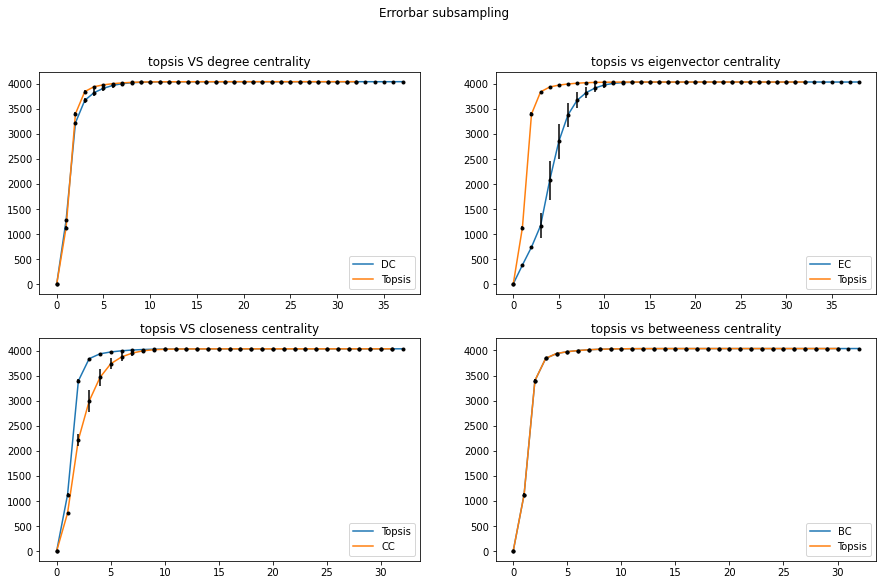

In [23]:
fig, ax = plt.subplots(2, 2,figsize=(15, 9))
ax[0, 0].set_title('topsis VS degree centrality')
ax[0, 0].plot(list(range(len(DCmean))) , DCmean, label='DC')
ax[0, 0].errorbar(list(range(len(DCmean))), DCmean, yerr=DCsd, fmt ='.k')
ax[0, 0].plot(list(range(len(TOPSISmean))), TOPSISmean, label='Topsis')
ax[0, 0].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=TOPSISsd, fmt ='.k')

ax[0, 0].legend()

ax[1, 0].set_title('topsis VS closeness centrality')
ax[1, 0].plot(list(range(len(TOPSISmean))), TOPSISmean, label='Topsis')
ax[1, 0].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=TOPSISsd, fmt ='.k')
ax[1, 0].plot(list(range(len(CCmean))) , CCmean, label='CC')
ax[1, 0].errorbar(list(range(len(CCmean))) , CCmean, yerr=CCsd, fmt ='.k')
ax[1, 0].legend()

ax[0, 1].set_title('topsis vs eigenvector centrality')
ax[0, 1].plot(list(range(len(ECmean))) , ECmean, label='EC')
ax[0, 1].errorbar(list(range(len(ECmean))) , ECmean, yerr=ECsd, fmt ='.k')
ax[0, 1].plot(list(range(len(TOPSISmean))), TOPSISmean, label='Topsis')
ax[0, 1].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=TOPSISsd, fmt ='.k')

ax[0, 1].legend()

ax[1, 1].set_title('topsis vs betweeness centrality')
ax[1, 1].plot(list(range(len(TOPSISmean))), TOPSISmean, label='BC')
ax[1, 1].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=TOPSISsd, fmt ='.k')
ax[1, 1].plot(list(range(len(BCmean))) , BCmean, label='Topsis')
ax[1, 1].errorbar(list(range(len(BCmean))) , BCmean, yerr=BCsd, fmt ='.k')
ax[1, 1].legend()


fig.suptitle('Errorbar subsampling')
plt.show()

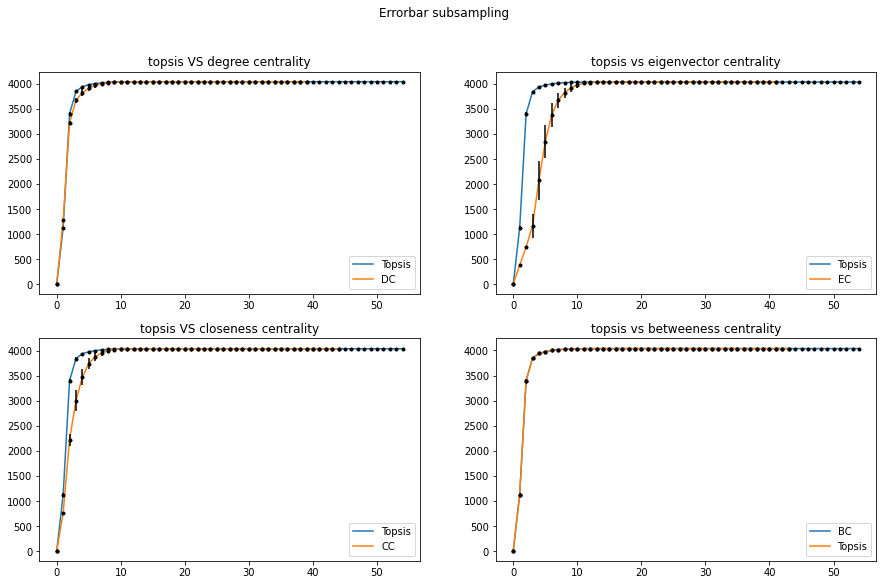

In [46]:
#10000
fig, ax = plt.subplots(2, 2,figsize=(15, 9))
ax[0, 0].set_title('topsis VS degree centrality')
ax[0, 0].plot(list(range(len(TOPSISmean))), TOPSISmean, label='Topsis')
ax[0, 0].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=TOPSISsd, fmt ='.k')
ax[0, 0].plot(list(range(len(DCmean))) , DCmean, label='DC')
ax[0, 0].errorbar(list(range(len(DCmean))), DCmean, yerr=DCsd, fmt ='.k')
ax[0, 0].legend()

ax[1, 0].set_title('topsis VS closeness centrality')
ax[1, 0].plot(list(range(len(TOPSISmean))), TOPSISmean, label='Topsis')
ax[1, 0].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=TOPSISsd, fmt ='.k')
ax[1, 0].plot(list(range(len(CCmean))) , CCmean, label='CC')
ax[1, 0].errorbar(list(range(len(CCmean))) , CCmean, yerr=CCsd, fmt ='.k')
ax[1, 0].legend()

ax[0, 1].set_title('topsis vs eigenvector centrality')
ax[0, 1].plot(list(range(len(TOPSISmean))), TOPSISmean, label='Topsis')
ax[0, 1].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=TOPSISsd, fmt ='.k')
ax[0, 1].plot(list(range(len(ECmean))) , ECmean, label='EC')
ax[0, 1].errorbar(list(range(len(ECmean))) , ECmean, yerr=ECsd, fmt ='.k')
ax[0, 1].legend()

ax[1, 1].set_title('topsis vs betweeness centrality')
ax[1, 1].plot(list(range(len(TOPSISmean))), TOPSISmean, label='BC')
ax[1, 1].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=TOPSISsd, fmt ='.k')
ax[1, 1].plot(list(range(len(BCmean))) , BCmean, label='Topsis')
ax[1, 1].errorbar(list(range(len(BCmean))) , BCmean, yerr=BCsd, fmt ='.k')
ax[1, 1].legend()


fig.suptitle('Errorbar subsampling')
plt.show()